# Python-in-the-lab: introduction to the classes I

In [1]:
import os
import numpy as np
import scipy.integrate as integrate
import matplotlib.pylab as plt
%matplotlib inline

We will reuse files already analysed, so we can concentrate on the logic!

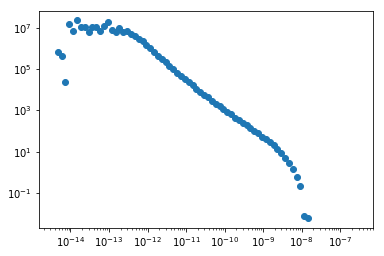

In [2]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"
filename = "F64ac_0.01_S.dat"
filename = os.path.join(mainDir, filename)
s, ps = np.loadtxt(filename, comments="#", unpack=True)
plt.loglog(s, ps, 'o'); # Nothing new...

### We would like to work a little with the data

The idea is the following:

Can we construction something general and sufficiently abstract from which we can extract the values more easily?

In [3]:
# Your first class
class Sdist: # Note the capital letter
    def __init__(self, filename): # Self???
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)

# Done?
THIS_IS_A_CONSTANT = 131231.23131   
filename = "F64ac_0.01_S.dat"
filename = os.path.join(mainDir, filename)
s001 = Sdist(filename)
# What is "self" ???

*self* is not a reserved word, but it is universality used a (self)-reference to the class.
It simply indentifies the class itself.

s001 is a call to the class, named a *instance* of the class

In [4]:
s001.ps[s001.ps != 0]

array([7.09426e+05, 4.26445e+05, 2.41955e+04, 1.50198e+07, 7.44998e+06,
       2.29251e+07, 1.12218e+07, 1.05320e+07, 6.66718e+06, 1.16563e+07,
       1.09002e+07, 6.96781e+06, 1.24547e+07, 1.95546e+07, 7.87439e+06,
       6.28456e+06, 1.00967e+07, 6.11875e+06, 7.34575e+06, 5.14724e+06,
       4.00538e+06, 2.85764e+06, 2.30620e+06, 1.50140e+06, 1.02132e+06,
       6.97577e+05, 4.54409e+05, 3.07353e+05, 2.12505e+05, 1.47726e+05,
       9.67887e+04, 6.87491e+04, 4.69031e+04, 3.30666e+04, 2.30293e+04,
       1.62495e+04, 1.15204e+04, 7.98031e+03, 5.68260e+03, 4.23867e+03,
       2.97384e+03, 2.13527e+03, 1.55214e+03, 1.17525e+03, 8.23620e+02,
       6.61500e+02, 4.52724e+02, 3.50047e+02, 2.60123e+02, 1.88037e+02,
       1.34791e+02, 9.54933e+01, 7.68208e+01, 5.41981e+01, 4.18298e+01,
       2.87398e+01, 2.15285e+01, 1.39254e+01, 8.90375e+00, 5.06903e+00,
       2.97192e+00, 1.50779e+00, 5.68595e-01, 2.21021e-01, 7.63318e-03,
       6.06325e-03])

s001.<tab> ? 
s001.__???

In [5]:
# Let's redifine the class
# as I want to get rid of the zeros of ps
class Sdist:
    def __init__(self, filename):
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len_ori = len(self.size)
        self.size, self.ps = self.avoid_zeros()
        print("%i lines deleted" % (s_len_ori - len(self.size)))
    
    def avoid_zeros(self):
        is_not_zero = self.ps != 0
        s = self.size[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps

14 lines deleted


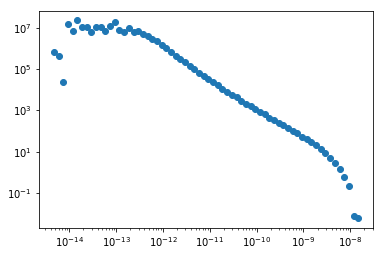

In [6]:
s001 = Sdist(filename)
plt.loglog(s001.size, s001.ps, 'o');

In [7]:
s001.ps[-10:] # good!

array([2.15285e+01, 1.39254e+01, 8.90375e+00, 5.06903e+00, 2.97192e+00,
       1.50779e+00, 5.68595e-01, 2.21021e-01, 7.63318e-03, 6.06325e-03])

##  Improvements
* Why don't we give just the frequency, so it takes care of all the rest?
* Can we leave the possibility to avoid the zeros as a choice?

In [8]:
# Let's redifine the class again
class Sdist:
    def __init__(self, freq, mainDir, is_avoid_zeros=True):
        filename = "F64ac_%s_S.dat" % freq
        filename = os.path.join(mainDir, filename)
        self.size, self.ps = np.loadtxt(filename, comments="#", unpack=True)
        s_len_ori = len(self.size)
        self._filename = filename
        if is_avoid_zeros:
            self.size, self.ps = self.avoid_zeros()
            print("%i lines deleted" % (s_len_ori - len(self.size)))
    
    def avoid_zeros(self):
        is_not_zero = self.ps != 0
        s = self.size[is_not_zero]
        ps = self.ps[is_not_zero]
        return s, ps

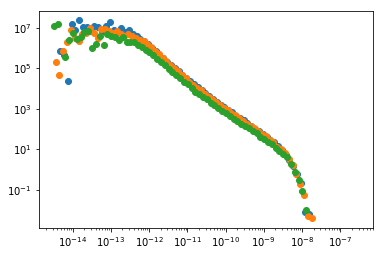

In [9]:
# Is it better to pass a string or a float?
s001 = Sdist(0.01, mainDir, is_avoid_zeros=False)
s002 = Sdist(0.02, mainDir, is_avoid_zeros=False)
s003 = Sdist(0.03, mainDir, is_avoid_zeros=False)
plt.loglog(s001.size, s001.ps, 'o')
plt.loglog(s002.size, s002.ps, 'o')
plt.loglog(s003.size, s003.ps, 'o')

In [10]:
s001._filename

'/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.01_S.dat'

In [11]:
# s001.ps, s001.size: Nothing else?
s001.__dict__.keys()

dict_keys(['size', 'ps', '_filename'])

### You seem to be able to do it for all the frequencies...

In [12]:
# Can we now do it for the 3 frequencies?
freqs = np.arange(1,4) / 100
# Can I make a dictionary?
s_distributions = dict()
for freq in freqs:
    s_distributions[freq] = Sdist(freq, mainDir)

s_distributions

14 lines deleted
12 lines deleted
14 lines deleted


{0.01: <__main__.Sdist at 0x7f8ce66be630>,
 0.02: <__main__.Sdist at 0x7f8ce6931ef0>,
 0.03: <__main__.Sdist at 0x7f8ce66bea58>}

In [13]:
s_distributions[0.03].ps[:10]

array([11991900., 15108900.,   338738.,  2429310.,  5685190.,  2692080.,
        3621790.,  5915990.,  6721880.,  1033120.])

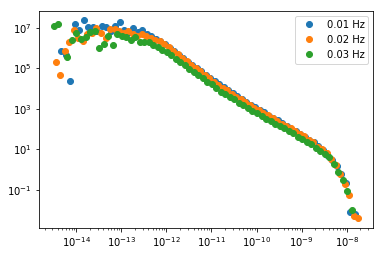

In [14]:
# Let's plot it
for freq in freqs:
    sd = s_distributions[freq]
    label = "%.2f Hz" % freq
    plt.loglog(sd.size, sd.ps, 'o', label=label)
plt.legend(numpoints=1); 

### Ok, ok, but this not so general enough!
#### I do not remember the frequencies, and I am interested in the files ending with S, T, u, v. Can we do something more general? 

In [15]:
# It would be nice to have something like...
# d_T = Dist("Duration", mainDir)
# d_S = Dist("Size", mainDir)
# d_E = Dist("Energy", mainDir)

### It is better to stop for a second. This starts to be pretty complex. I cannot put everything here

Let's make a separated script for the class. We will learn how to use it...

[Work on cplot_distributions.py]

Done? 

In [16]:
import cplot_distributions as d1
mainDir = "/home/gf/src/Python/Python-in-the-lab/Bk"

In [18]:
d_size = d1.Dist('Size', mainDir)

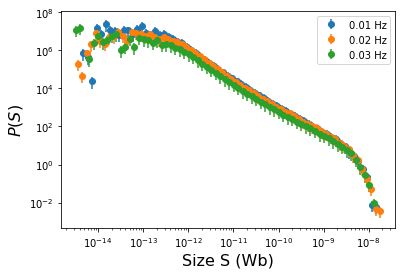

In [19]:
d_size.plot()

### Classes can redefine operations

In [ ]:
class Rectangle:
    """
    This class defines operations on Rectangles
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height
        self.area = base * height
        self.p = self._get_perim()
        self._diagonal = (base*base + height * height)**0.5 
    
    def _get_perim(self, half=False):
        """
        Get the perimeter of the Rectange
        Parameters:
        ----------
        half: Bool.
             If True, get the semiperimeter
        """
        p = self.base + self.height
        if half:
            return p
        else:
            return 2 * p
        
    def print_perimeter(self):
        return "The perimeter is %f" % self.p
    
    def __add__(self, other):
        base = self.base + other.base
        height = self.height + other.height
        return Rectangle(base,height)
    
    def __repr__(self):
        return "Rectangle of {0} by {1}".format(self.base, self.height)

p0 = Rectangle(3,2)
p1 = Rectangle(1,1)
p2 = Rectangle(2,0.5)

In [ ]:
print p0.base, p0.height, p0.p, p0.area
p0.print_perimeter()

In [ ]:
# Construct a larger Rectange
p3 = p0 + p1
print p3.base, p3.height, p3.p, p3.area

In [ ]:
p3